# ML-Based Potential Energy Surface Estimation (Prototype)
This notebook presents a minimal machine learning prototype to estimate a potential energy surface (PES) of a hydrogen molecule interacting with a metal surface, using synthetic DFT-like data. The aim is to demonstrate how simple regression models can capture physical behavior.

## 1. Introduction
In computational chemistry, the potential energy surface (PES) maps the total energy of a molecular system with respect to its atomic positions. 
Traditional quantum mechanical methods such as Density Functional Theory (DFT) are often expensive. 
This prototype shows how we can use machine learning (ML) models to interpolate PES from a few sampled points.

In [1]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## 2. Sample Data
The data below simulates energy values (eV) as a function of the distance (Å) between H₂ and a small metal cluster. This mimics results that would be obtained from DFT calculations.

In [2]:
# Distance (Å) and energy (eV) data
X = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]).reshape(-1, 1)
y = np.array([3.2, 1.5, -0.2, -0.6, -0.3, 0.5, 1.4])

## 3. Ridge Regression (Baseline Linear Model)
We first try a basic Ridge Regression to fit the data. This will act as a linear approximation of the PES.

In [3]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
x_range = np.linspace(1.0, 4.0, 200).reshape(-1, 1)
y_ridge_pred = ridge.predict(x_range)

## 4. Polynomial Regression (Better Physical Behavior)
Next, we use a 4th-degree polynomial regression to better capture the non-linear shape of a real PES.

In [4]:
# Polynomial Regression
degree = 4
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(x_range)

## 5. Visualization and Comparison
We now compare the two models in a single plot.

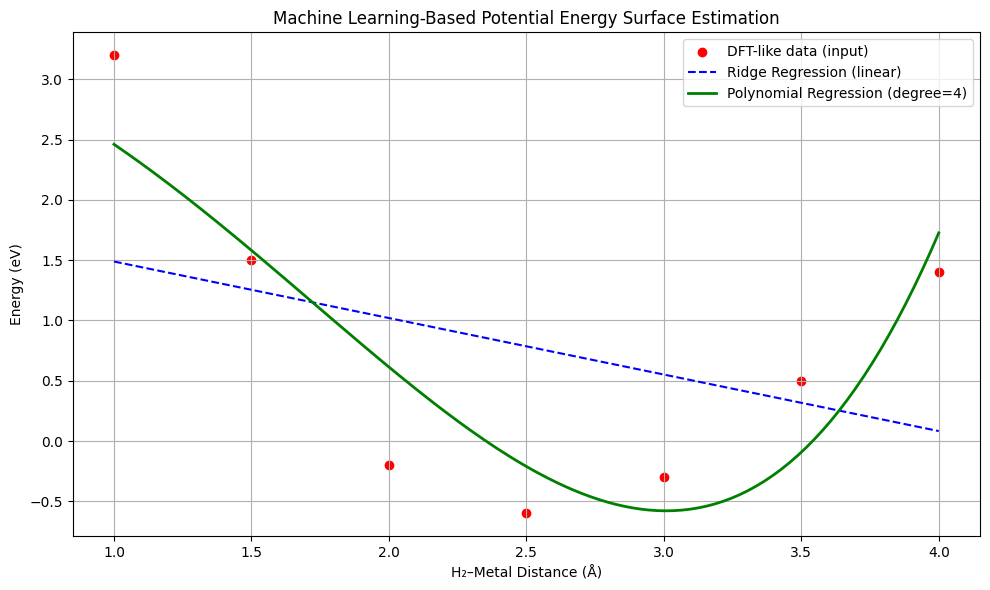

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='DFT-like data (input)')
plt.plot(x_range, y_ridge_pred, color='blue', linestyle='--', label='Ridge Regression (linear)')
plt.plot(x_range, y_poly_pred, color='green', label=f'Polynomial Regression (degree={degree})', linewidth=2)
plt.xlabel('H₂–Metal Distance (Å)')
plt.ylabel('Energy (eV)')
plt.title('Machine Learning-Based Potential Energy Surface Estimation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Conclusion
- Ridge Regression fails to capture the non-linear PES shape.
- Polynomial Regression (degree=4) produces a more realistic energy curve with a minimum and curvature.
- This project demonstrates how simple ML models can be used to prototype PES estimation from sample quantum data.